In [1]:
import os
import cv2
import matplotlib.pyplot as plt 
from xml.etree.ElementTree import parse

이미지 크기 정보 >>  640 480
이미지 이름 :  01.jpg
이미지 경로 >>  ./01.jpg
dog
cat


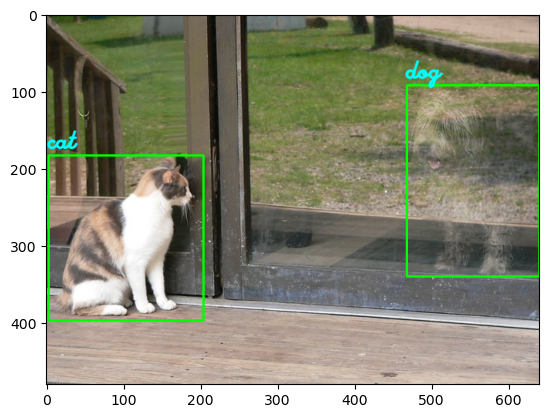

In [3]:
def xml_read(xml_path) :
    root = parse(xml_path).getroot()
    
    image_info = root.findall('image')
    
    for image in image_info :
        bbox = image.findall('box')
        
        # image width height
        image_width = image.attrib['width']
        image_height = image.attrib['height']
        print("이미지 크기 정보 >> " , image_width, image_height)
        
        # image name 
        image_name = image.attrib['name']
        print("이미지 이름 : " , image_name)
        image_path = os.path.join("./", image_name)
        print("이미지 경로 >> ", image_path)
        
        # image read 
        image = cv2.imread(image_path)
        # BGR - RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        for box_info in bbox : 
            label = box_info.attrib['label']
            print(label)
            
            xtl = box_info.attrib['xtl']
            ytl = box_info.attrib['ytl']
            xbr = box_info.attrib['xbr']
            ybr = box_info.attrib['ybr']
            
            # string -> float 
            xtl_f = float(xtl)
            ytl_f = float(ytl)
            xbr_f = float(xbr)
            ybr_f = float(ybr)
                        
            # float -> int 
            xtl_i = int(xtl_f)
            ytl_i = int(ytl_f)
            xbr_i = int(xbr_f)
            ybr_i = int(ybr_f)
            
            # 그리기 
            image = cv2.rectangle(image, (xtl_i, ytl_i) , (xbr_i, ybr_i), (0,255,0), 2)
            
            # 라벨 추가 
            image = cv2.putText(image, label, (xtl_i, ytl_i-10), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (0,255,255), 2,
                               cv2.LINE_AA)

    plt.imshow(image)
    plt.show()
            
xml_read("./annotations.xml")

In [ ]:
# 